In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import beta, binomial, dirichlet, multinomial

%matplotlib inline  

In [2]:
def initialize(V, N, labels, a=1.0, b=1.0, eta=1.0):
    pi = beta(a, b)
    L = binomial(1, pi, N)
    for n in range(N):
        if labels[n] == -1: continue
        L[n] = labels[n]
    theta_0, theta_1 = dirichlet([eta] * V, 2)
    return theta_0, theta_1, L

In [3]:
def generate_data(V, N, M=100, a=1.0, b=1.0, eta=1.0):
  theta_0, theta_1, labels = initialize(V, N, [-1] * N, a=a, b=b, eta=eta)
  corpus = []
  for n in range(N):
    theta = theta_0 if labels[n] == 0 else theta_1
    corpus.append(multinomial(M, theta))
  return corpus, labels    

In [4]:
def update(theta_0, theta_1, L, corpus, labels, a=1.0, b=1.0, eta=1.0):

    N = len(corpus)
    V = len(corpus[0])
    
    C = [len([l for l in L if l == 0]), len([l for l in L if l == 1])]
    
    # compute current words counts:
    cnts = []
    for v in range(V):
        word_cnts = [a, b]
        for n in range(N):
            word_cnts[L[n]] += corpus[n][v]
        cnts.append(word_cnts)
    
    # update document labels
    for n in range(N):
        l = L[n]
        if labels[n] == -1:
            # subtract document's word counts from the corresponding class counts:
            for v in range(V):
                cnts[v][l] -= corpus[n][v]
            # subtract 1 from class counts for the corresponding label:
            C[l] -= 1
            # compute document label probabilities
            if C[0] == 0: p = 1.0
            elif C[1] == 0: p = 0.0
            else:
              # compute the product of probabilities (sum of logs)
              value0 = np.log(float(C[0])/(N+a+b-1))
              value1 = np.log(float(C[1])/(N+a+b-1))
              for v in range(V):
                  value0 += np.log(theta_0[v])*corpus[n][v]
                  value1 += np.log(theta_1[v])*corpus[n][v]
              # Divide by a common number to avoid problems of small numbers.
              divisor = (value0+value1)/2
              value0 = np.exp(value0-divisor)
              value1 = np.exp(value1-divisor)
              p = value1 / (value0 + value1)
            # sample the new label:
            L[n] = binomial(1, p)
            # update document count for this label
            C[L[n]] += 1
            # add document's word counts from the corresponding class counts:
            for v in range(V): cnts[v][L[n]] += corpus[n][v]
      
    # sample new theta
    t0 = []
    t1 = []
    for v in range(V):
        t0.append(cnts[v][0])
        t1.append(cnts[v][1])
    theta_0 = dirichlet(t0)
    theta_1 = dirichlet(t1)
  
    return theta_0, theta_1, L

In [5]:
def sample(corpus, labels, iterations=100, a=1.0, b=1.0, eta=1.0):
    N = len(corpus)
    V = len(corpus[0])
    theta_0, theta_1, L = initialize(V, N, labels, a=a, b=b, eta=eta)
    trace = [L]
    
    for t in range(iterations):
        theta_0, theta_1, L = update(theta_0, theta_1, L, corpus, labels, a=a, b=b, eta=eta)
        trace.append(L)
    
    return trace

In [6]:
def compute_accuracy(N, p, L, true_labels):
    predicted_labels = [L[i] for i in range(int(N * p), N)] 
    correct = 0
    for i in range(0,len(predicted_labels)):
        if predicted_labels[i] == true_labels[i]: correct += 1
    accuracy = float(correct)/len(predicted_labels)
    return accuracy

In [7]:
def run_simulation(N=50, V=5, M=100, iterations=100, p=0.7, a=2, b=2, eta=1.0):
    corpus, labels = generate_data(V, N, M, a=a, b=b, eta=eta)
    # Partition the data into training and test sets:
    true_labels = []
    for i in range(int(N * p), N):
        true_labels.append(labels[i])
        labels[i] = -1
    trace = sample(corpus, labels, iterations=iterations, a=a, b=b, eta=eta)
    return compute_accuracy(N, p, trace[-1], true_labels)

Results: 1.000
Average accuracy = 1.000


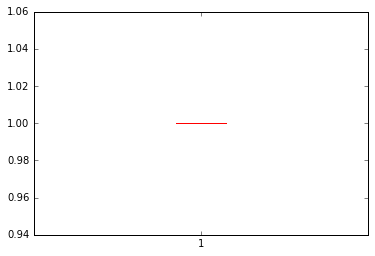

In [19]:
results = []
cnt = 0
while cnt < 1:
    accuracy = run_simulation(N=500, V=500, M=100, iterations=100, p=0.75, a=2, b=2, eta=1.0)
    results.append(accuracy)
    cnt += 1
print("Results: %s" % ", ".join("%0.3f" % x for x in results))
print("Average accuracy = %0.3f" % np.average(results))
plt.boxplot(results);

In [22]:
%time accuracy = run_simulation(N=500, V=1000, M=100, iterations=100, p=0.75, a=2, b=2, eta=1.0)

CPU times: user 43.9 s, sys: 8 ms, total: 43.9 s
Wall time: 43.9 s


In [23]:
accuracy

1.0

In [ ]:
results = [] 
for i in range(int(N * p),N): results.append(traces[-1][i])
correct = 0
for i in range(0,len(results)):
    if results[i] == target[i]: correct += 1
accuracy = float(correct)/len(results)
print("Accuracy is", accuracy)
plt.boxplot(results)

In [ ]:
for t, p in zip(target, traces[-1][int(N * p):]): print(t,p)

In [ ]:
data = genNB(n,m)
      accuracy.append(gibbsSampling(data['data'],data['l'],iterations,partition))
    print("Accuracy average at {0} is {1}".format(partition,numpy.average(accuracy)))
sample(corpus, labels, iterations=100, a=1.0, b=1.0, eta=1.0)

In [ ]:
print('a -->>', state['a'])
print('b -->>', state['b'])
print('eta -->>', state['eta'])
print('L -->>', state['L'][:10])
print('theta-->>', state['theta'])
print('corpus-->>', state['corpus'])
print(state.keys())

In [ ]:
def update_labels(): pass
def update_theta(): pass
def update(V, N, training_label_map, L, theta_0, theta_1): 
    # document counts:
    C_0 = len([l for l in L if l == 0])
    C_1 = N - C_0
    word_cnts = []
      # Counts of words
    for i in range(V):
    nc = [1,1]
    for j in range(0,n):
      nc[prevsample['l'][j]] += prevsample['data'][j][i]
    NC.append(nc)

  
def gibbsIterate(prevsample,labels):
  "Gibbs sampler iteration"
  n = len(prevsample['data'])
  m = len(prevsample['data'][0])
  
  # Counts of documents
  C = [len([l for l in prevsample['l'] if l==0]),
       len([l for l in prevsample['l'] if l==1])]
       
  # Counts of words
  NC = list()
  for i in range(0,m):
    nc = [1,1]
    for j in range(0,n):
      nc[prevsample['l'][j]] += prevsample['data'][j][i]
    NC.append(nc)
    
  for j in range(0,n):
    # for each document label
    if labels[j] == -1:
      # If the label is not from the training set, let's resample it
      
      # subtract j's word counts from NC of whatever class it's member of
      for i in range(0,m):
        NC[i][prevsample['l'][j]] -= prevsample['data'][j][i]
	
      # subtract 1 from the count of documents with label Lj
      C[prevsample['l'][j]] -= 1
      
      if C[0] == 0:
        p1 = 1
      elif C[1] == 0:
        p1 = 0
      else:
          # compute the product of probabilities (sum of logs)
          value0 = log(float(C[0])/(n+1))
          value1 = log(float(C[1])/(n+1))
          for i in range(0,m):
              value0 += log(prevsample['theta'][0][i])*prevsample['data'][j][i]
              value1 += log(prevsample['theta'][1][i])*prevsample['data'][j][i]
          # Divide by a common number to avoid problems of small numbers.
          divisor = (value0+value1)/2
          value0 = exp(value0-divisor)
          value1 = exp(value1-divisor)
          p1 = value1 / (value0 + value1)
      
      # sample the new label
      prevsample['l'][j] = mtrand.binomial(1,p1)
      
      # add 1 to the counts of documents with label Lj
      C[prevsample['l'][j]] += 1
      
      # add j's word counts to the total word counts for class Lj
      for i in range(0,m):
        NC[i][prevsample['l'][j]] += prevsample['data'][j][i]
      
  # sample new theta
  t0 = list()
  t1 = list()
  for i in range(0,m):
    # For each word
    t0.append(NC[i][0])
    t1.append(NC[i][1])
  prevsample['theta'][0] = mtrand.dirichlet(t0)
  prevsample['theta'][1] = mtrand.dirichlet(t1)
  
  return prevsample
 

# from numpy.random import mtrand
from numpy import log, exp

In [ ]:
numpy.random.beta(a, b, size=None)
numpy.random.dirichlet(alpha, size=None)

In [ ]:
# nbgibbs.py - An implementation of the Naive Bayes Gibbs sampler described in
# Resnik & Hardisty (2010), Gibbs sampling for the uninitiated, CS-TR-4956
# Author: Diego Molla <dmollaaliod@gmail.com>
# Date: 30 August 2011
# http://sourceforge.net/p/nbgibbs

from numpy.random import mtrand
from numpy import log, exp

def initialise(n,m,labels):
  # Generate the probability of each of the m words in each class
  theta = list()
  gamma_theta = [1]*m
  theta.append(mtrand.dirichlet(gamma_theta))
  theta.append(mtrand.dirichlet(gamma_theta))
  # Generate the labels
  pi = mtrand.beta(1,1)
  l = mtrand.binomial(1,pi,size=n)
  # Overwrite with training data
  for i in range(0,n):
    if labels[i] != -1:
      l[i] = labels[i]
  # Return results
  return {'l':l,'theta':theta,'pi':pi}

def genNB(n,m,w=100):
  """Generate a sample for testing
  n documents
  m distinct words
  w words per document"""
  d = initialise(n,m,[-1]*n)
  data = list()
  for i in range(0,n):
    label = d['l'][i]
    data.append(mtrand.multinomial(w,d['theta'][label]))
  d['data'] = data
  return d
  
def gibbsSampling(observations,labels,iterations,partition=0.7):
  "Run NB Gibbs sampling"
  n = len(observations)
  m = len(observations[0])
  
  #  print "Target labels are", labels
  
  # Partition the data set: 70% train, 30% test
  target = list()
  for i in range(int(n*partition),n):
    target.append(labels[i])
    labels[i] = -1

  s = initialise(n,m,labels)
  #  print "Target theta is", s['theta']
  s['data'] = observations
  result = [s['l']]
  #  print s['l']
  for t in range(0,iterations):
    s = gibbsIterate(s,labels)
    result.append(s['l'])
  #    print s['l']
  #    print "Theta is", s['theta']

  # Evaluation of accuracy. We take the result of the last iteration.
  # We would probably have better results if we took the mode of
  # all iterations.
  results = list()
  for i in range(int(n*partition),n):
    results.append(s['l'][i])
  correct = 0
  for i in range(0,len(results)):
    if results[i] == target[i]:
      correct += 1
  accuracy = float(correct)/len(results)
  #  print "Accuracy is", accuracy
  return accuracy
  #  return result
  
def gibbsIterate(prevsample,labels):
  "Gibbs sampler iteration"
  n = len(prevsample['data'])
  m = len(prevsample['data'][0])
  
  # Counts of documents
  C = [len([l for l in prevsample['l'] if l==0]),
       len([l for l in prevsample['l'] if l==1])]
       
  # Counts of words
  NC = list()
  for i in range(0,m):
    nc = [1,1]
    for j in range(0,n):
      nc[prevsample['l'][j]] += prevsample['data'][j][i]
    NC.append(nc)
    
  for j in range(0,n):
    # for each document label
    if labels[j] == -1:
      # If the label is not from the training set, let's resample it
      
      # subtract j's word counts from NC of whatever class it's member of
      for i in range(0,m):
        NC[i][prevsample['l'][j]] -= prevsample['data'][j][i]
	
      # subtract 1 from the count of documents with label Lj
      C[prevsample['l'][j]] -= 1
      
      if C[0] == 0:
        p1 = 1
      elif C[1] == 0:
        p1 = 0
      else:
          # compute the product of probabilities (sum of logs)
          value0 = log(float(C[0])/(n+1))
          value1 = log(float(C[1])/(n+1))
          for i in range(0,m):
              value0 += log(prevsample['theta'][0][i])*prevsample['data'][j][i]
              value1 += log(prevsample['theta'][1][i])*prevsample['data'][j][i]
          # Divide by a common number to avoid problems of small numbers.
          divisor = (value0+value1)/2
          value0 = exp(value0-divisor)
          value1 = exp(value1-divisor)
          p1 = value1 / (value0 + value1)
      
      # sample the new label
      prevsample['l'][j] = mtrand.binomial(1,p1)
      
      # add 1 to the counts of documents with label Lj
      C[prevsample['l'][j]] += 1
      
      # add j's word counts to the total word counts for class Lj
      for i in range(0,m):
        NC[i][prevsample['l'][j]] += prevsample['data'][j][i]
      
  # sample new theta
  t0 = list()
  t1 = list()
  for i in range(0,m):
    # For each word
    t0.append(NC[i][0])
    t1.append(NC[i][1])
  prevsample['theta'][0] = mtrand.dirichlet(t0)
  prevsample['theta'][1] = mtrand.dirichlet(t1)
  
  return prevsample
    

if __name__ == "__main__":
  import sys
  from matplotlib import pyplot
  import numpy
  if len(sys.argv) != 4:
    print("Usage: python {0} num_docs num_words num_iterations".format(sys.argv[0]))
    print("e.g. python {0} 50 5 5".format(sys.argv[0]))
    exit()
    
  n = int(sys.argv[1])
  m = int(sys.argv[2])
  iterations = int(sys.argv[3])
  nsamples = 1000
  number = 0
  for p in range(0,10):
    partition = float(p)/10
    number += 1
    accuracy = list()
    for i in range(0,nsamples):
      data = genNB(n,m)
      accuracy.append(gibbsSampling(data['data'],data['l'],iterations,partition))
    print("Accuracy average at {0} is {1}".format(partition,numpy.average(accuracy)))
#    print "Accuracy values are", accuracy
    pyplot.subplot(2,5,number)
    pyplot.hist(accuracy,bins=10)
    pyplot.ylim(ymax=nsamples)
    pyplot.xlim(xmin=0)
    pyplot.text(0.2,int(nsamples*0.8),'mean = {0:3.3f}'.format(numpy.mean(accuracy)))
    pyplot.title("{0} for training".format(partition))
  pyplot.show()
